# PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

2023-04-07 23:12:21.417859: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 23:12:23.397128: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 23:12:23.409396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 23:12:36.042082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
!pip install onednn-cpu-gomp
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'

Defaulting to user installation because normal site-packages is not writeable


# PATH, LABEL, TRANSFORMATION

In [3]:
Main_Video_Path = Path("Real Life Violence Dataset")
Video_Path = list(Main_Video_Path.glob(r"*/*.mp4"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path))
Video_Path_Series = pd.Series(Video_Path,name="MP4").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")
Main_MP4_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)

In [4]:
Violence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "Violence"]
NonViolence_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "NonViolence"]

Violence_Data = Violence_Data.reset_index()
NonViolence_Data = NonViolence_Data.reset_index()

# DATA PROCESS

In [5]:
FPS = 30
DELAY = int(100/FPS)
# when it is necessary

#### VIOLENCE TRANSFORMATION

In [6]:
violence_frame_list = []

for file_video in Violence_Data.MP4:
    Video_File_Path = file_video
    
    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(240,240))
            violence_frame_list.append(Frame_Resize)
            
            
    Video_Caption.release()

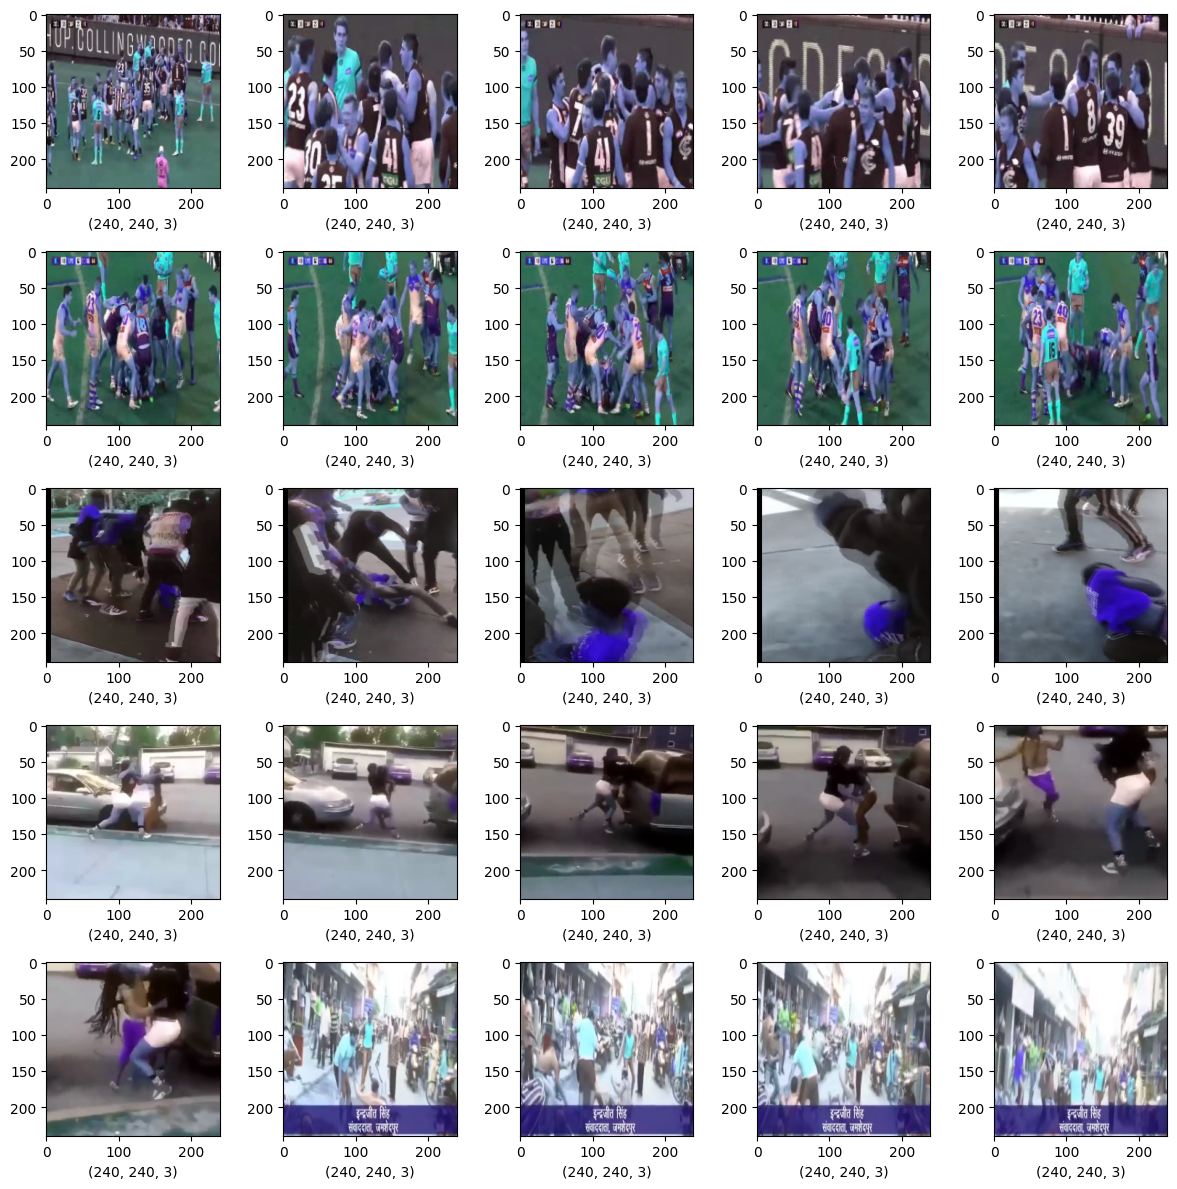

In [7]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = violence_frame_list[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [8]:
X_4D_Violence = np.asarray(violence_frame_list)

In [9]:
print(np.shape(X_4D_Violence))

(5832, 240, 240, 3)


In [10]:
X_4D_Violence_Labels = np.ones((5832,1))

In [11]:
print(np.shape(X_4D_Violence_Labels))

(5832, 1)


In [12]:
X_4D_Violence_Labels = X_4D_Violence_Labels.flatten()

In [13]:
X_4D_Violence_Labels = X_4D_Violence_Labels.astype(int)

In [14]:
print(X_4D_Violence_Labels)

[1 1 1 ... 1 1 1]


#### NON-VIOLENCE TRANSFORMATION

In [15]:
nonviolence_frame_list = []

for file_video in NonViolence_Data.MP4:
    Video_File_Path = file_video
    
    Video_Caption = cv2.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv2.resize(frame,(240,240))
            nonviolence_frame_list.append(Frame_Resize)
            
            
    Video_Caption.release()

[h264 @ 0x559dd1cc9f80] mb_type 104 in P slice too large at 98 31
[h264 @ 0x559dd1cc9f80] error while decoding MB 98 31


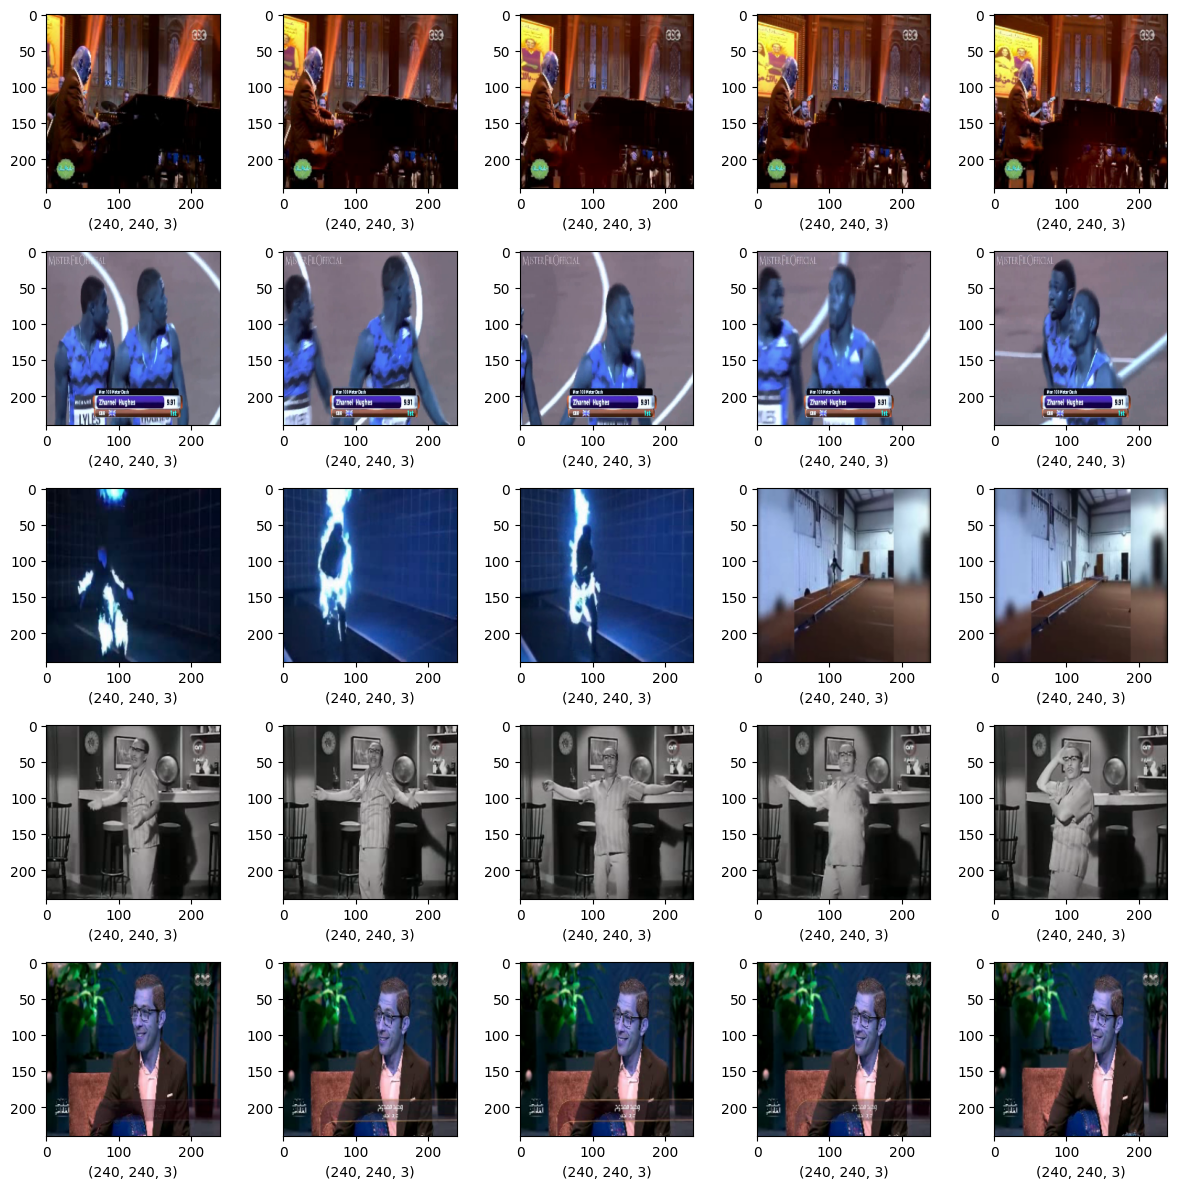

In [16]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = nonviolence_frame_list[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [17]:
X_4D_NonViolence = np.asarray(nonviolence_frame_list)

In [18]:
print(np.shape(X_4D_NonViolence))

(4985, 240, 240, 3)


In [19]:
X_4D_NonViolence_Labels = np.ones((4985,1))

In [20]:
print(np.shape(X_4D_NonViolence_Labels))

(4985, 1)


In [21]:
X_4D_NonViolence_Labels = X_4D_NonViolence_Labels.flatten()

In [22]:
X_4D_NonViolence_Labels = X_4D_NonViolence_Labels.astype(int)

In [23]:
print(np.shape(X_4D_NonViolence_Labels))

(4985,)


In [24]:
print(X_4D_NonViolence_Labels)

[1 1 1 ... 1 1 1]


#### CONCAT VIOLENCE AND NON-VIOLENCE

In [25]:
X_Train = np.concatenate((X_4D_Violence,X_4D_NonViolence),axis=0)

In [26]:
print(np.shape(X_Train))

(10817, 240, 240, 3)


In [27]:
Y_Train = np.concatenate((X_4D_Violence_Labels,X_4D_NonViolence_Labels),axis=0)

In [28]:
print(np.shape(Y_Train))

(10817,)


In [29]:
Target_X = X_Train
Label_X = Y_Train

# SPLITTING TRAIN AND TEST

In [30]:
xTrain,xTest,yTrain,yTest = train_test_split(Target_X,Label_X,train_size=0.9,random_state=42,shuffle=True)

In [31]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(9735, 240, 240, 3)
(9735,)
(1082, 240, 240, 3)
(1082,)


# MODEL

In [32]:
Model = Sequential()

Model.add(SeparableConv2D(12,(3,3),activation="relu",
                 input_shape=(240,240,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(SeparableConv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(64,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(LSTM(64,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(128,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [33]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 238, 238, 12)     75        
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 238, 238, 12)     48        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 12)     0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 119, 119, 24)     420       
 leConv2D)                                                       
                                                                 
 dropout (Dropout)           (None, 119, 119, 24)      0

In [34]:
Callback_Stop_Early = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3)

In [35]:
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [36]:
CNN_Model = Model.fit(xTrain,yTrain,
                      validation_data=(xTest,yTest),
                      callbacks=Callback_Stop_Early,
                      epochs=50)

Epoch 1/50
305/305 [==============================] - 194s 611ms/step - loss: 0.0028 - accuracy: 0.9979 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
305/305 [==============================] - 184s 604ms/step - loss: 1.5339e-24 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
305/305 [==============================] - 185s 607ms/step - loss: 1.1173e-26 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
305/305 [==============================] - 184s 604ms/step - loss: 1.8746e-25 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
305/305 [==============================] - 185s 608ms/step - loss: 1.7412e-24 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
305/305 [==============================] - 183s 601ms/step - loss: 1.0311e-20 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [37]:
Model_Test_Prediction = Model.predict(xTest)

34/34 [==============================] - 4s 107ms/step


In [38]:
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)
print(Model_Test_Prediction)

[0 0 0 ... 0 0 0]


In [39]:
Model_Test_Prediction_Class = Model.predict(xTest)

34/34 [==============================] - 4s 106ms/step


In [40]:
print(Model_Test_Prediction_Class.flatten())

[1. 1. 1. ... 1. 1. 1.]


In [41]:
Model.save("summa")
  

2023-04-07 23:35:48.946304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,59,24]
	 [[{{node inputs}}]]
2023-04-07 23:35:48.950470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,?,59,24]
	 [[{{node inputs}}]]
2023-04-07 23:35:49.036630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/P

INFO:tensorflow:Assets written to: summa/assets


INFO:tensorflow:Assets written to: summa/assets


In [42]:
!pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 3.5 MB/s eta 0:00:0000:0100:01


In [43]:
visualkeras.layered_view(Model)

NameError: name 'visualkeras' is not defined